In [1]:
# base
import os
import datetime

# data
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt

# model
from sklearn.ensemble import RandomForestRegressor

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from base.data import Data

In [4]:
data = Data()
data.load()

In [5]:
from base.process import Process

In [6]:
process = Process(data.x,data.y)

====== dropping columns ======
UvAerosolLayerHeight_aerosol_height
UvAerosolLayerHeight_aerosol_pressure
UvAerosolLayerHeight_aerosol_optical_depth
UvAerosolLayerHeight_sensor_zenith_angle
UvAerosolLayerHeight_sensor_azimuth_angle
UvAerosolLayerHeight_solar_azimuth_angle
UvAerosolLayerHeight_solar_zenith_angle
NitrogenDioxide_cloud_fraction (too many inifinity values)


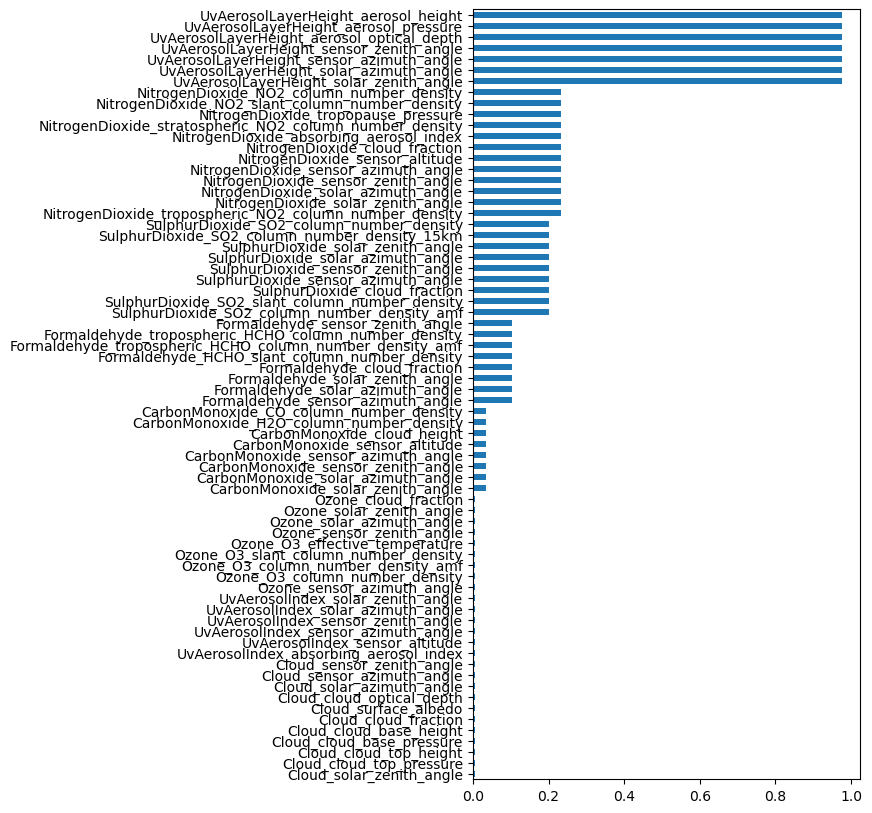

In [7]:
process.drop()

====== pre cap ======


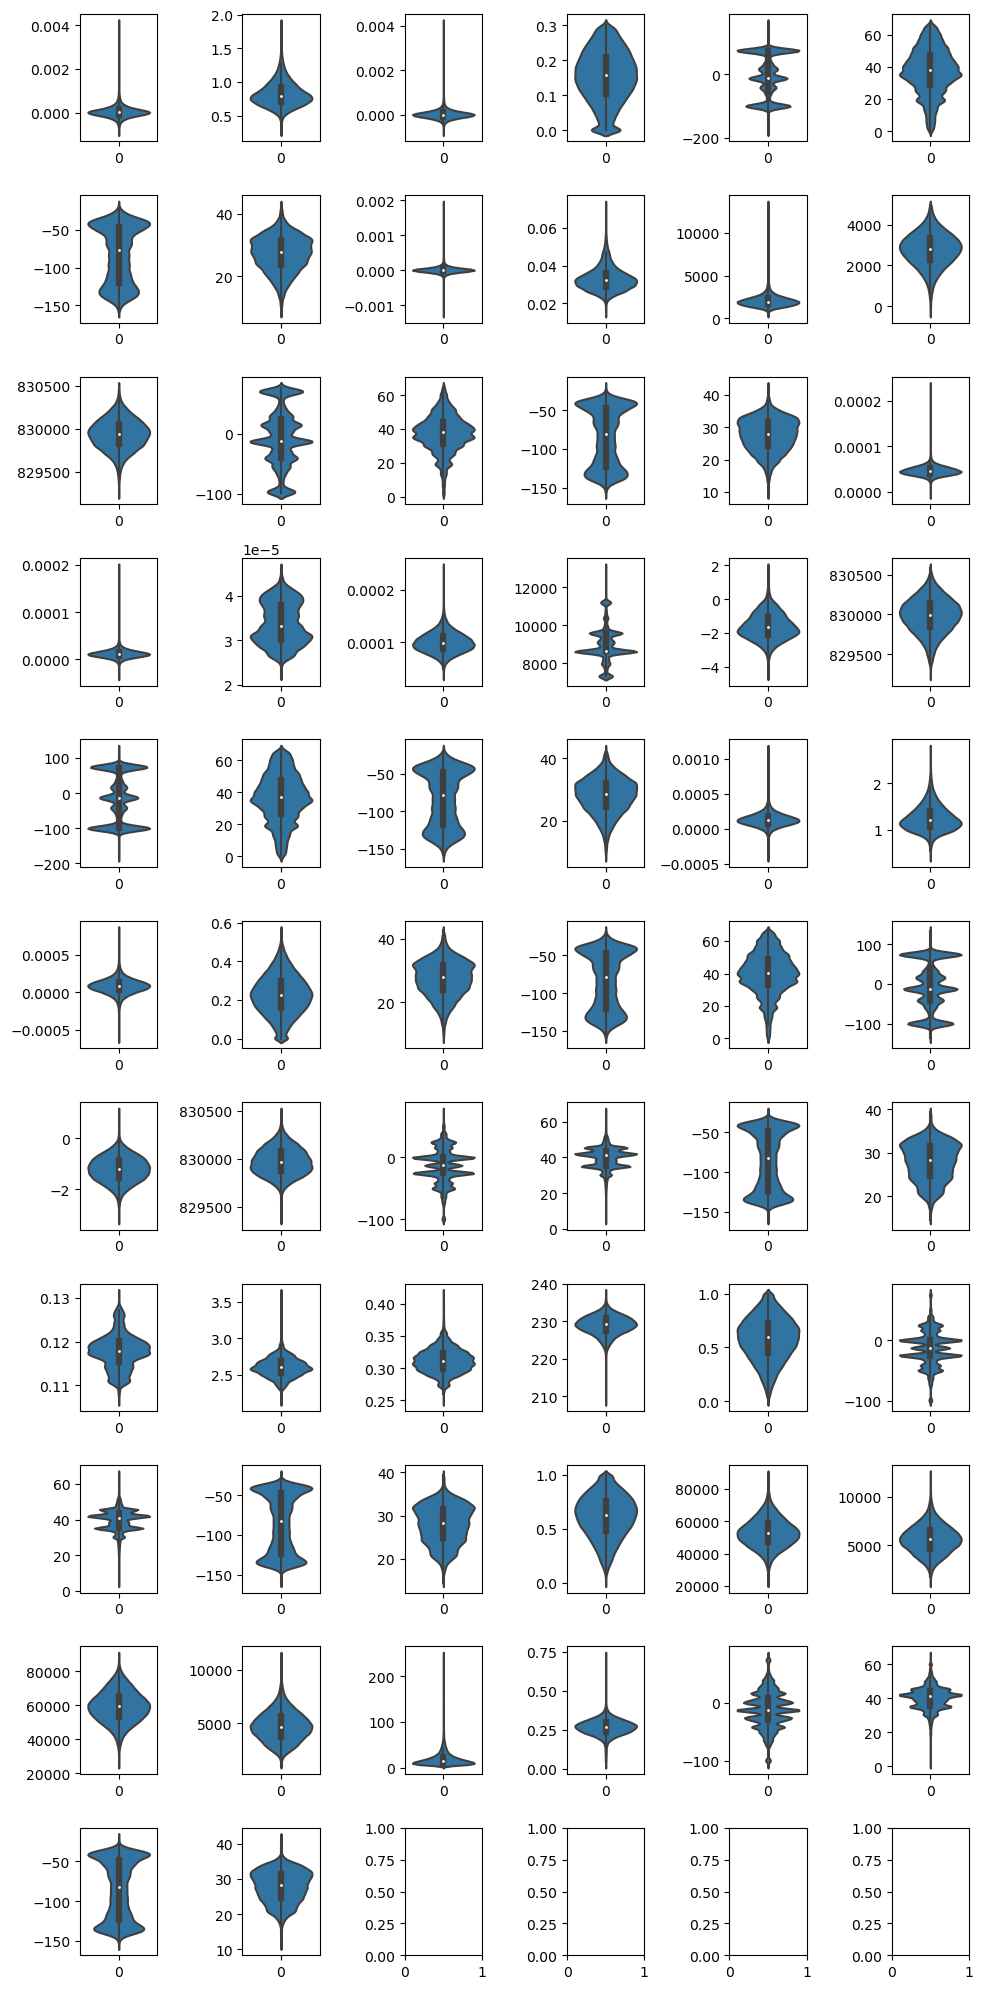

In [8]:
process.cap()

====== pre log ======
SulphurDioxide_SO2_column_number_density
SulphurDioxide_SO2_column_number_density_amf
SulphurDioxide_SO2_slant_column_number_density
SulphurDioxide_SO2_column_number_density_15km
CarbonMonoxide_CO_column_number_density
CarbonMonoxide_H2O_column_number_density
Formaldehyde_tropospheric_HCHO_column_number_density_amf
Cloud_cloud_optical_depth
====== post log ======
====== label skew (pre vs. post) ======


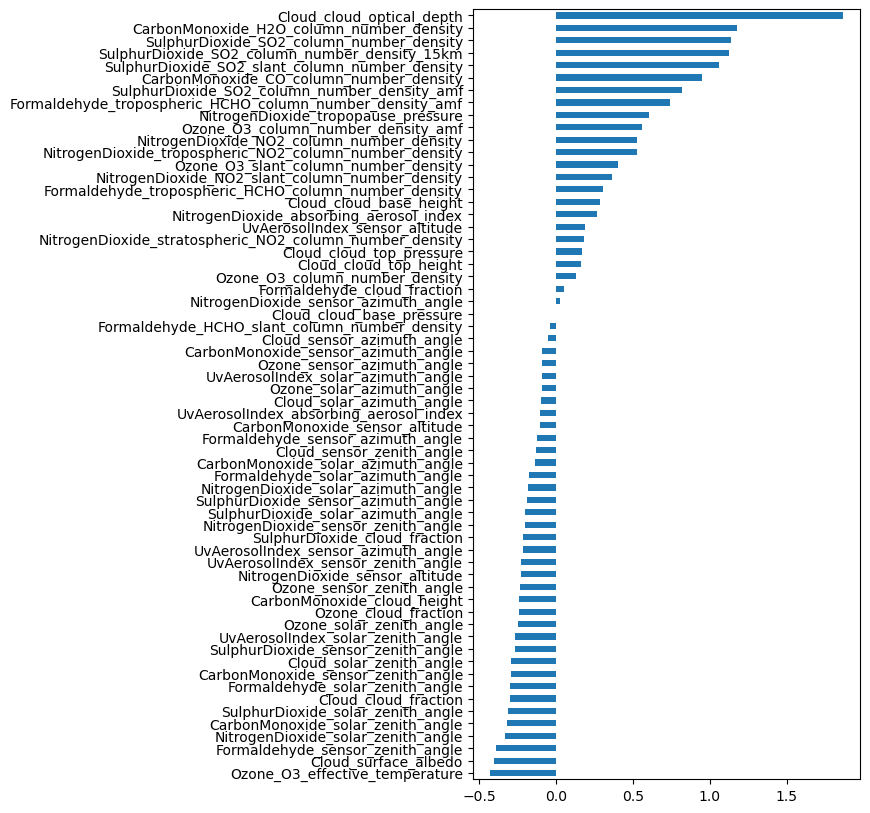

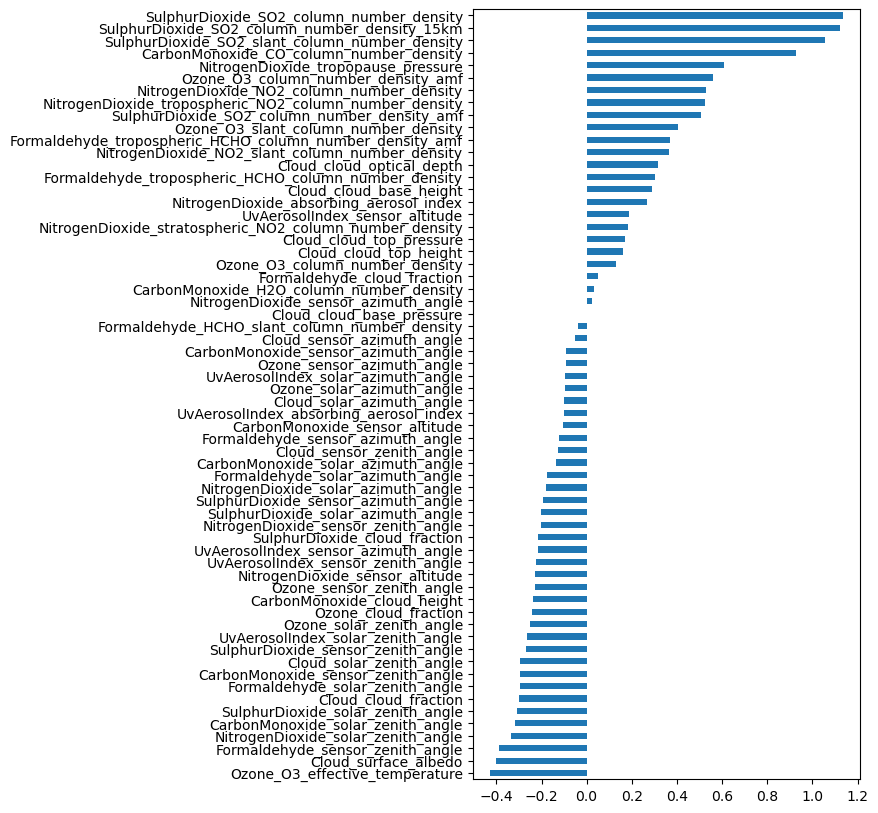

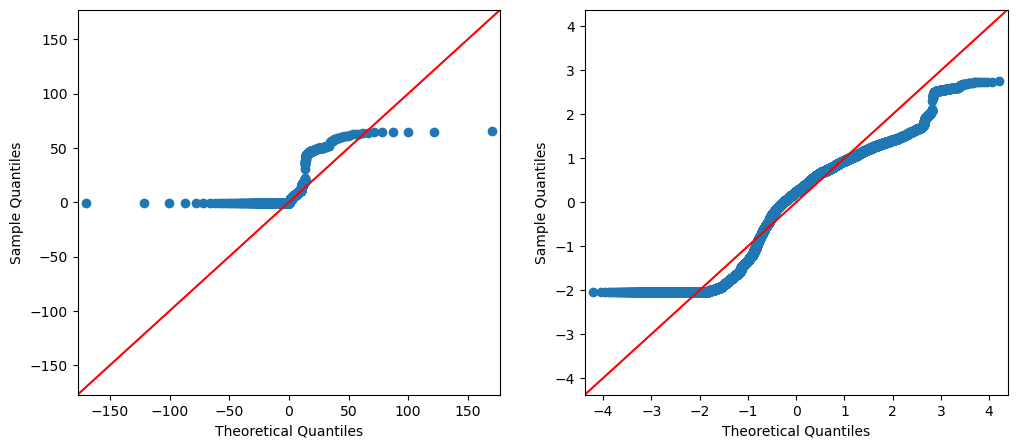

In [9]:
process.skew()

In [10]:
process.parse()

/Users/tjordan/Documents/github/co2/base/process.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df[['year','week_no']].apply(lambda x: datetime.date(int(x.year),1,1)+datetime.timedelta(days=int(x.week_no*7)),axis=1)
/Users/tjordan/Documents/github/co2/base/process.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.date.apply(lambda x: x.month)
/Users/tjordan/Documents/github/co2/base/process.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [11]:
process.scale()

In [12]:
process.fill()

No missing values


/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
process.combine()

In [14]:
# process.feature_selection()

In [15]:
process.split()

In [16]:
from base.model import Model,MODELS

In [19]:
models = [
    Model(**{
        'x_train': process.x_train,
        'y_train': process.y_train,
        'x_test': process.x_test,
        'y_test': process.y_test,
        'x_predict': process.x_predict,
        'run_grid': False,
        **m,
    })
    for m in MODELS
    # if m['name'] == 'cat'
    if m['name'] not in [
        'rf',
        # 'ransac','mlp','svm',
        # 'sgd','lso','en','kr',
    ]
]

In [20]:
for model in models:
    print(model.name)
    model.run('test')
    model.run('main')
    model.eval()

gb
xgb


In [ ]:
meta = Model(**{
        'x_train': pd.concat([model.pred_train for model in models],axis=1),
        'y_train': models[0].y_train,
        'x_test': pd.concat([model.pred_test for model in models],axis=1),
        'y_test': models[0].y_test,
        'x_predict': pd.concat([model.pred_main for model in models],axis=1),
        'run_grid': False,
        'name': 'meta',
        'model': RandomForestRegressor,
        'params': None,
    })

meta.run('test')
meta.run('main')
meta.eval()

In [ ]:
eval = pd.DataFrame([{'model': model.name,'rmse': model.rmse,'mae': model.mae,} for model in models+[meta]]).sort_values('rmse')

<Axes: xlabel='model'>

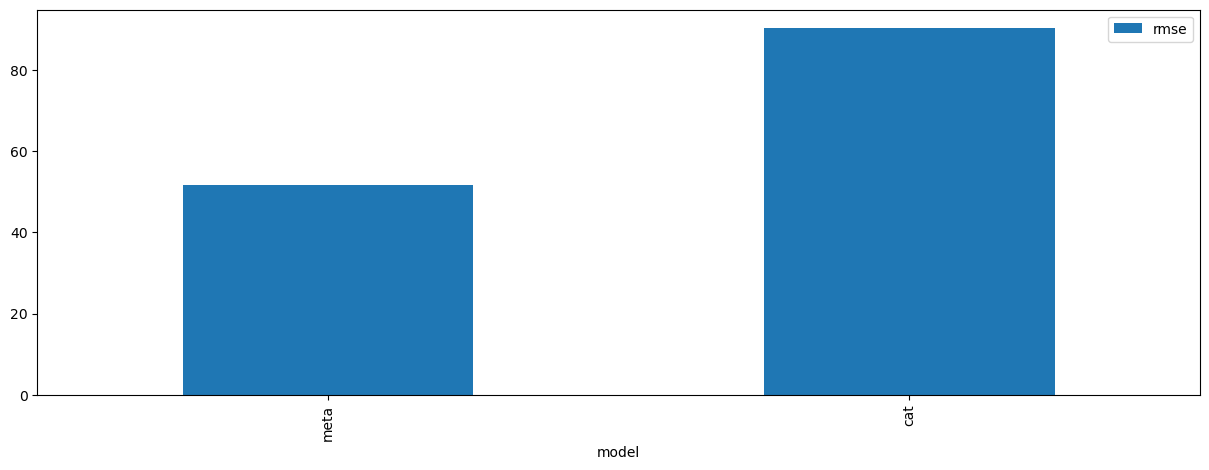

In [ ]:
eval.plot(kind='bar',x='model',y=['rmse'],figsize=(15,5))

In [1]:
for model in models:
    if model.name=='gb':
        pd.concat([model.pred_test,np.exp(model.y_test)],axis=1).plot(kind='scatter',x='emission',y=model.name,figsize=(15,5))
        model.pred_main.rename('emission').to_csv(os.path.join('~','Downloads','pred.csv'),index=True)

NameError: name 'models' is not defined